In [273]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [274]:
from helper import load_data, normalize_data

data = load_data()

data

array([[  3.6  ,  79.   ],
       [  1.8  ,  54.   ],
       [  3.333,  74.   ],
       [  2.283,  62.   ],
       [  4.533,  85.   ],
       [  2.883,  55.   ],
       [  4.7  ,  88.   ],
       [  3.6  ,  85.   ],
       [  1.95 ,  51.   ],
       [  4.35 ,  85.   ],
       [  1.833,  54.   ],
       [  3.917,  84.   ],
       [  4.2  ,  78.   ],
       [  1.75 ,  47.   ],
       [  4.7  ,  83.   ],
       [  2.167,  52.   ],
       [  1.75 ,  62.   ],
       [  4.8  ,  84.   ],
       [  1.6  ,  52.   ],
       [  4.25 ,  79.   ],
       [  1.8  ,  51.   ],
       [  1.75 ,  47.   ],
       [  3.45 ,  78.   ],
       [  3.067,  69.   ],
       [  4.533,  74.   ],
       [  3.6  ,  83.   ],
       [  1.967,  55.   ],
       [  4.083,  76.   ],
       [  3.85 ,  78.   ],
       [  4.433,  79.   ],
       [  4.3  ,  73.   ],
       [  4.467,  77.   ],
       [  3.367,  66.   ],
       [  4.033,  80.   ],
       [  3.833,  74.   ],
       [  2.017,  52.   ],
       [  1.867,  48.   ],
 

### Initialize your cluster centers

In [275]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    
    num_of_features = data.shape[1]
    
    min_vals = []
    max_vals = []
    
    #Finding min and max values for each feature 
    for feature_index in range(0,num_of_features):
        
        min_vals.append(np.amin(data, axis=0)[feature_index])
        max_vals.append(np.amax(data, axis=0)[feature_index])

    
    #Creating first clusters randomly within min/max-bounds of each feature
    clusters = np.zeros([k,num_of_features])
    
    for i in range(0,k):
        for feature_index in range(0, num_of_features):
            
            min_val = min_vals[feature_index]
            max_val = max_vals[feature_index]

            clusters[i][feature_index] = random.uniform(min_val, max_val)
        
        
    return clusters


In [276]:
clusters = initialize_clusters(data, 3)

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [292]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    
    number_of_datapoints = data.shape[0]
    number_of_k = mu.shape[0]
    
    distance_matrix = np.zeros([number_of_datapoints,number_of_k])
    
    for datapoint_index in range(number_of_datapoints):
        
        for k_index in range(number_of_k):
                        
            datapoint = data[datapoint_index]
            mu_val = mu[k_index]
            
            distance = np.linalg.norm(datapoint - mu_val)
            distance_matrix[datapoint_index][k_index] = distance
            
    return distance_matrix

In [293]:
distance_matrix = build_distance_matrix(data, clusters)

#### Update k-means parameters

In [321]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update kmeans parameters
    
    num_samples = data.shape[0]
    num_k = mu_old.shape[0]
    num_features = mu_old.shape[1]
    
    losses = []
    assignments = np.zeros([num_samples,1], dtype=int)
    mu = np.zeros([num_k, num_features])
    
    distances = build_distance_matrix(data, mu_old)
    
    for point in range(num_samples):
        
        # Loss
        
        
        min_loss = np.amin(distances[point])  
        
        #k_index = np.where(distances[point] == min_loss)[0].item()
       
        k_index = np.where(distances[point] == min_loss)
            
        try:
            k_index = k_index[0].item()
        except:
            print(k_index)
            
        losses.append(min_loss)
    
        
        
        losses.append(min_loss)
        
        #Updating Z
        assignments[point] = k_index
        
    #Updating MU
    for k_index in range (num_k):
        
        mean = np.zeros([1,num_features])[0]
        num_points_belonging = 0
        
        for point in range(num_samples):
            
            if(assignments[point] == k_index):
                
                num_points_belonging += 1
                datapoint = data[point]
                mean += datapoint
                
        new_cluster = mean / num_points_belonging
        
        mu[k_index] = new_cluster
        
    return losses, assignments, mu
    

    # ***************************************************
    #raise NotImplementedError

In [295]:
losses, assignments, mu = update_kmeans_parameters(data, clusters)

#### Play with k-means

In [296]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu
        
return losses, assignments, mu

# define parameters
k = 3
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

SyntaxError: 'return' outside function (<ipython-input-296-a6fd7cea820c>, line 28)

## Using k-means for image compresson

#### load image

In [297]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [316]:
def preprocess_image(original_image):
    """preprocess the image."""

    normalized_image = original_image #normalize_data(original_image)
    
    #Flatten the image-matrix! 
    processed_image = np.reshape(normalized_image, (normalized_image.shape[0] * normalized_image.shape[1], 
                                                   normalized_image.shape[2]))    
    return processed_image


In [317]:
processed_image = preprocess_image(original_image)

The current iteration of k-means is: 0,                the average loss is 83.69027357744429.


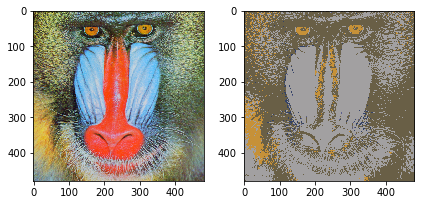

The current iteration of k-means is: 1,                the average loss is 51.50146174812085.


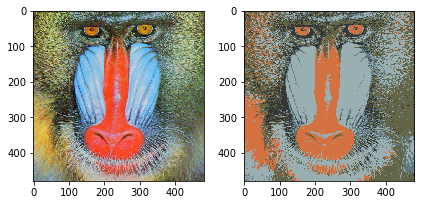

The current iteration of k-means is: 2,                the average loss is 42.30824720814834.


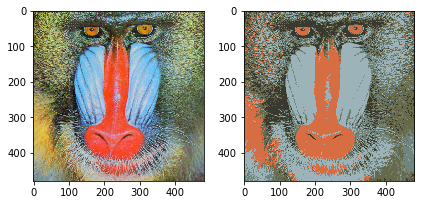

K:  5
size of original: 691200
size of compressed: 230415
ratio:  0.3333550347222222


In [325]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: use kmean to compress the image.
    # ***************************************************
    
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
                    
        #plot histgram
        plot_image_compression(original_image, processed_image, assignments, mu, k)
            
        # update k-means information.
        mu_old = mu
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

# define parameters
k = 5
max_iter = 5
threshold = 10

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

size_of_orig_image = original_image.shape[0] * original_image.shape[1] * 3 
size_of_compressed_image = original_image.shape[0] * original_image.shape[1] + k * 3

print("K: ", k)
print("size of original:", size_of_orig_image)
print("size of compressed:", size_of_compressed_image)
print("ratio: ", size_of_compressed_image / size_of_orig_image )
